In [1]:
from agents.dummy_agent import DummyAgent


### Dummy Agent
The dummy agent has no intelligent backend to generate responses, but is depending on so called dummy responses from the user.
Without having to rely on the correctness of the underlying models, usage can be made understandable and expectations can be defined.

In [2]:
agent = DummyAgent()

First, we add a few nodes to the graph that describe our context.\
The agent should then determine the relationship between these nodes and present the generated graph.

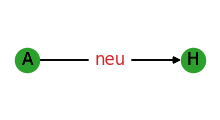

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river."
}


In [3]:
agent.add_node("A", "I live in Hamburg.")
agent.add_node("H", "I live nearby a river.")
agent.relation_between("A", "H", dummy_response = "<rel1><:><neu><;>")
agent.display_Graph()

The agent colored the nodes that were added by the user in green, while the relation between the nodes in colored red. This coloring allows the user to differentiate between statements and relations that were generated by the user or by the model.\
We chose the relationship type **neu** for this task, because one could live in Hamburg without living nearby a river, but it is possible to live nearby a river.\
\
Next we ask the agent to explain the relation type between the nodes and generate a new node **Exp** for explanation. 

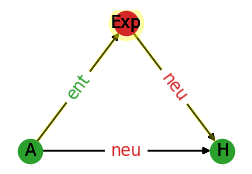

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "It's possible for someone to live in Hamburg nearby a river, but also far away from a river."
}


In [4]:
_, changed_nodes, changed_edges, _ = agent.explain_relation("A", "H", "Exp", dummy_response = "<t2><:>It's possible for someone to live in Hamburg nearby a river, but also far away from a river.<;>")
agent.display_Graph(changed_nodes, changed_edges)

Every explanation entails from its source, but inherits the same relation to the target, in this case **neu**.\
The explanation reflects our explanation made in the previous operation.\
\
Next we task the agent to generate a new statement from our source node, with the relationship type neutral.

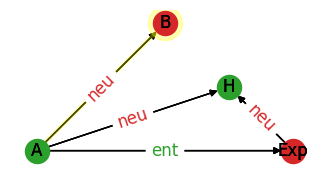

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "It's possible for someone to live in Hamburg nearby a river, but also far away from a river.",
    "B": "I live nearby the Bille."
}


In [5]:
_, changed_nodes, changed_edges, _ = agent.generate_entailment("A", "B", relation="neu", dummy_response = "<t2><:>I live nearby the Bille.<;>")
agent.display_Graph(changed_nodes, changed_edges)

The agent generates a new statement, talking about living nearby the Bille, a branch of the Elbe. This statement is possible but not necessarily true as well.\
\
Last we task the agent to predict the relation type between our newly crated node "I live nearby the Bille." and the former target node "I live nearby a river."

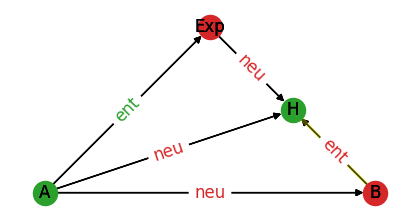

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "It's possible for someone to live in Hamburg nearby a river, but also far away from a river.",
    "B": "I live nearby the Bille."
}


In [6]:
_, changed_nodes, changed_edges, _ = agent.relation_between("B", "H", dummy_response = "<rel1><:><ent><;>")
agent.display_Graph(changed_nodes, changed_edges)

As expected, the agent responses with the entailment relationship type, because living nearby the Bille does indeed infer living nearby a river.